In [11]:
# === Stage 8: Exploratory Data Analysis (EDA) ===

import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 导入 src1 模块 ---
sys.path.append('../')
from src1.data_io import load_processed_data

# === 1. 加载 Stage 7 清洗后的数据 ===
df = load_processed_data("TSLA_no_outliers.csv")
print("Data shape:", df.shape)
print(df.info())

# === 2. 分列处理 ===
price_cols = ["Open", "High", "Low", "Close"]
volume_col = ["Volume"]

# === 3. 数据统计摘要 ===
print("=== Descriptive Statistics: Price Columns ===")
print(df[price_cols].describe())

print("\n=== Missing Values: Price Columns ===")
print(df[price_cols].isna().sum())

print("\n=== Skewness: Price Columns ===")
print(df[price_cols].skew())

print("\n=== Descriptive Statistics: Volume ===")
print(df[volume_col].describe())

print("\n=== Missing Values: Volume ===")
print(df[volume_col].isna().sum())

print("\n=== Skewness: Volume ===")
print(df[volume_col].skew())



[load_processed_data] Loaded from C:\Users\go199\Desktop\PY HW\bootcamp_Wu_Chuyu\project\notebook\data\processed\TSLA_no_outliers.csv
Data shape: (38, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    38 non-null     object 
 1   Close   38 non-null     float64
 2   High    38 non-null     float64
 3   Low     38 non-null     float64
 4   Open    38 non-null     float64
 5   Volume  38 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.9+ KB
None
=== Descriptive Statistics: Price Columns ===
             Open        High         Low       Close
count   38.000000   38.000000   38.000000   38.000000
mean   164.454736  169.595789  160.019737  165.835526
std     37.455382   38.121551   36.760768   37.282283
min    103.000000  111.750000  101.809998  108.099998
25%    126.089998  130.417503  124.487497  127.572498
50%    175.970001  18

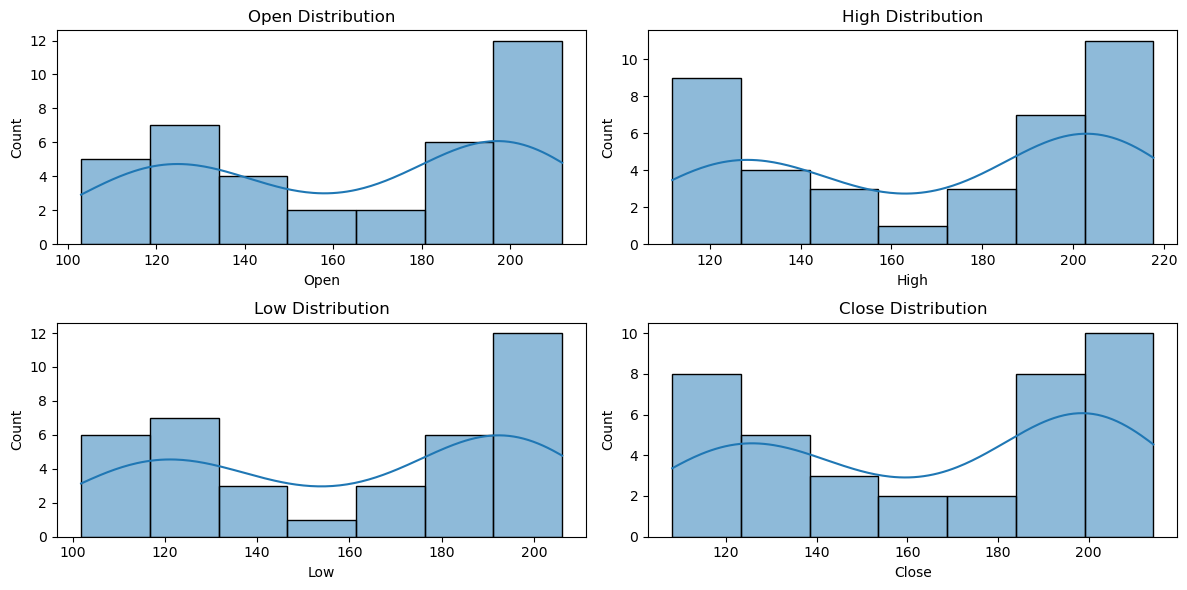

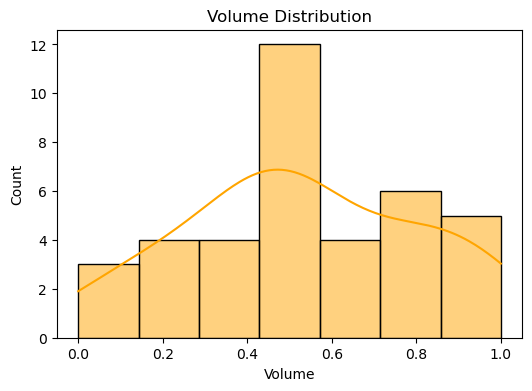

In [12]:
# === 4. 单变量分布可视化 ===
plt.figure(figsize=(12,6))
for i, col in enumerate(price_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# Volume 单独分布图
plt.figure(figsize=(6,4))
sns.histplot(df["Volume"], kde=True, color='orange')
plt.title("Volume Distribution")
plt.show()


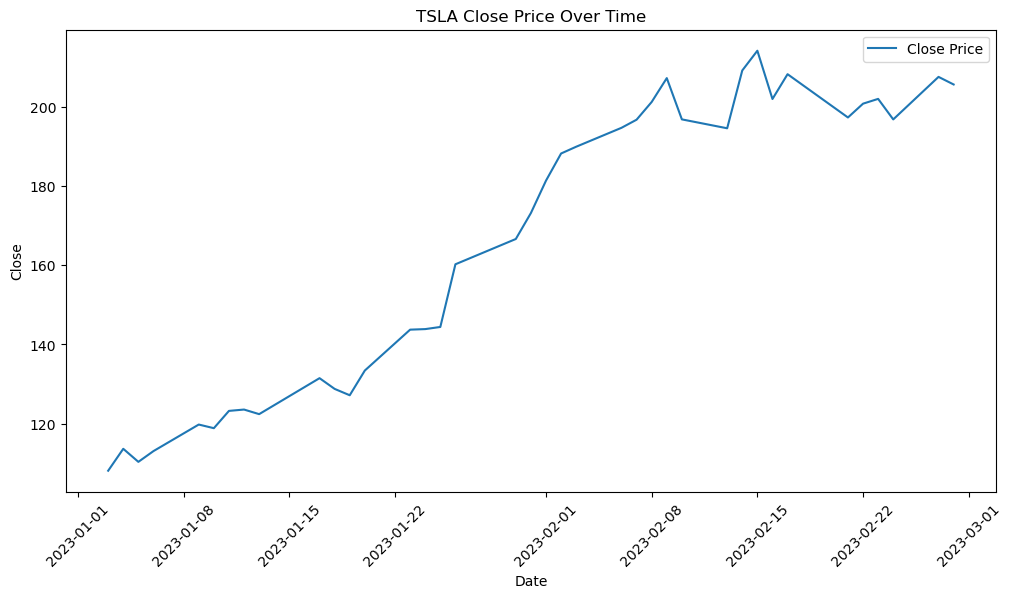

In [13]:
# === 5. 时间序列趋势（Close Price） ===
plt.figure(figsize=(12,6))
plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Close Price')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("TSLA Close Price Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

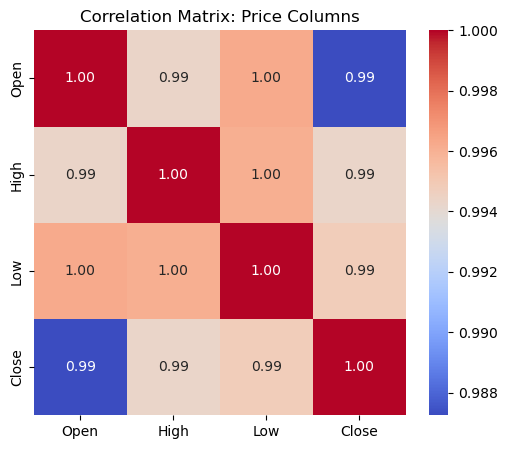

In [14]:
# === 6. 相关性矩阵（价格列） ===
corr = df[price_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Price Columns")
plt.show()


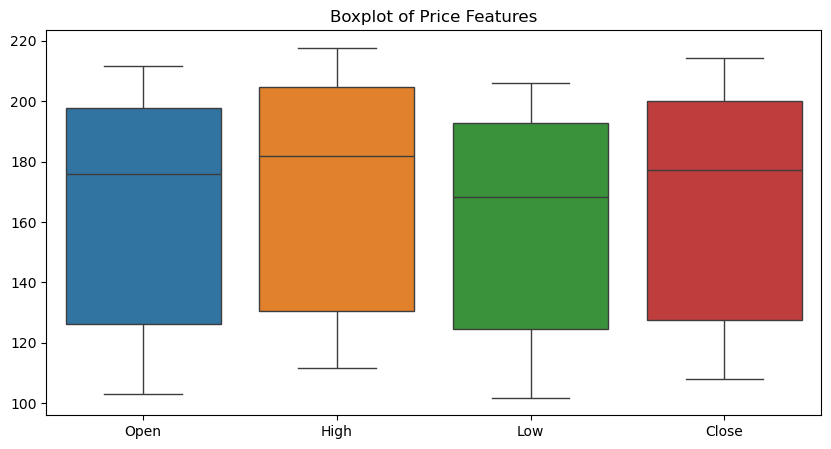

In [15]:
# === 7. 箱线图（价格列） ===
plt.figure(figsize=(10,5))
sns.boxplot(data=df[price_cols])
plt.title("Boxplot of Price Features")
plt.show()



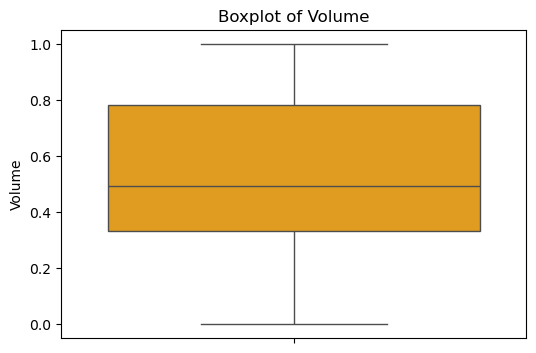

In [16]:
# Volume 单独箱线图
plt.figure(figsize=(6,4))
sns.boxplot(y=df["Volume"], color='orange')
plt.title("Boxplot of Volume")
plt.show()
